In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
from copy import deepcopy
from pandas import DataFrame
from collections import OrderedDict

from scipy.interpolate import interp1d
from scipy.optimize import minimize_scalar, least_squares
from scipy.optimize import minimize
import datetime

# Gaussian beam propagation (Single value)

## Space

In [3]:
# % --------------------------------------------------->
#% Definitions
#% --------------------------------------------------->
lam = 1.064e-6;
#% --------------------------------------------------->
#% Initial Beam
#% --------------------------------------------------->
w0 = .5e-3; # meters
z0 = -5;    # meters
zR = np.pi*w0**2/lam  # meters
th = 2*lam/(np.pi*w0)
# Initial q: q0
q0 = 1j*np.pi*w0**2/lam

#% --------------------------------------------------->
#% Matrices definitions
#% --------------------------------------------------->
L1 = 2
S1  = np.array([[1, L1],[0, 1]]);

#% --------------------------------------------------->
#% Beam propagation
#% --------------------------------------------------->
M_qout = S1 @ np.array([[1], [1/q0]]);
#% New q complex factor
q1 = M_qout[0]/M_qout[1];

#% --------------------------------------------------->
#% Beam parameters at distance L1
#% --------------------------------------------------->
w1 = np.sqrt(-lam/np.pi*(1/np.imag(1/q1)))
R1 = 1/np.real(1/q1);
#% --------------------------------------------------->

print('w1',w1)
print('R1',R1)
print('zR',zR)
print('th',th)

w1 [0.00144405]
R1 [2.27243726]
zR 0.7381561686066243
th 0.0013547268755982132


# Gaussian beam propagation (vectors)
## Space

In [4]:
z = np.linspace(-6, 5, 1000) # (min, max, nsteps)
w = np.zeros(len(z))
R = np.zeros(len(z))
yth = np.zeros(len(z))
# % --------------------------------------------------->
#% Definitions
#% --------------------------------------------------->
lam = 1.064e-6;
#% --------------------------------------------------->
#% Initial Beam
#% --------------------------------------------------->
w0 = .5e-3;           # meters
z0 = -5;              # meters
zR = np.pi*w0**2/lam  # meters
th = 2*lam/(np.pi*w0)

i=0
for s in z:
    i=i+1
    # Initial q: q0
    q0 = 1j*np.pi*w0**2/lam
    #% --------------------------------------------------->
    #% Matrices definitions
    #% --------------------------------------------------->
    #% Arms
    L1 = 2
    S1  = np.array([[1, s],[0, 1]]);
    #% --------------------------------------------------->
    #% Beam propagation
    #% --------------------------------------------------->
    M_qout = S1 @ np.array([[1], [1/q0]]);
    #% New q complex factor
    q1 = M_qout[0]/M_qout[1]-z0;
    #% --------------------------------------------------->
    #% Beam parameters at distance L1
    #% --------------------------------------------------->
    w[i-1] = np.sqrt(-lam/np.pi*(1/np.imag(1/q1)))
    R[i-1] = 1/np.real(1/q1);
    yth[i-1] = th/2 * (s-z0)
    #% --------------------------------------------------->
    

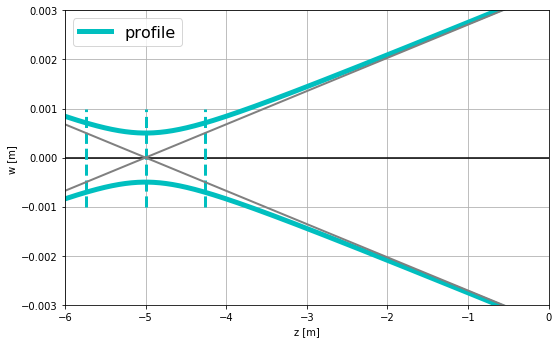

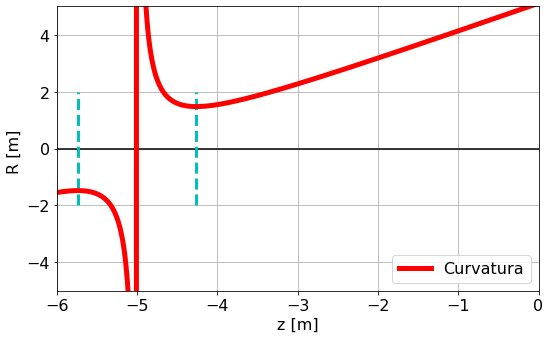

In [5]:
#fig = plt.figure(figsize=(8, 5), dpi=80)
#fig = plt.subplot(figsize=(8, 5), dpi=80)
fig, ax = plt.subplots(1,1, figsize = (8,5))
matplotlib.rcParams['font.size'] = 16

plt.plot(z,w,   label = 'profile', color = 'c',     lw = 5) 
plt.plot(z,-w,   color = 'c',      lw = 5) 
plt.plot(z,yth,   color = 'grey',      lw = 2) 
plt.plot(z,-yth,   color = 'grey',      lw = 2)
# matplotlib.pyplot.hlines(y, xmin, xmax, colors='k', linestyles='solid', label='', *, data=None, **kwargs)[source]
plt.hlines(0,-6,0)
plt.vlines(z0,-1e-3,1e-3,colors='c',linestyles='--',lw = 3)
plt.vlines(zR+z0,-1e-3,1e-3,colors='c',linestyles='--',lw = 3)
plt.vlines(-zR+z0,-1e-3,1e-3,colors='c',linestyles='--',lw = 3)

plt.ylabel("w [m] ")
plt.xlabel("z [m]")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xlim(-6,0)
plt.ylim(-3e-3,3e-3)
#plt.savefig("profilo.eps")
plt.show()

#fig = plt.figure(figsize=(8, 5), dpi=80)
matplotlib.rcParams['font.size'] = 16
fig, ax = plt.subplots(1,1, figsize = (8,5))

plt.plot(z,R,   label = 'Curvatura', color = 'r',     lw = 5) 
#plt.plot(z,yth,   color = 'grey',      lw = 2) 
#plt.plot(z,-yth,   color = 'grey',      lw = 2)
# matplotlib.pyplot.hlines(y, xmin, xmax, colors='k', linestyles='solid', label='', *, data=None, **kwargs)[source]
plt.hlines(0,-6,0)
plt.vlines(z0,-1e-3,1e-3,colors='c',linestyles='--',lw = 3)
plt.vlines(zR+z0,-2,2,colors='c',linestyles='--',lw = 3)
plt.vlines(-zR+z0,-2,2,colors='c',linestyles='--',lw = 3)

plt.ylabel("R [m] ")
plt.xlabel("z [m]")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xlim(-6,0)
plt.ylim(-5,5)
#plt.savefig("curvatura.eps")
plt.show()



# Space-Lens-Space

In [6]:
# limiti plot
Is = -6
Ie = 6
# Posizione lente
z1 = -3
z1vec = np.linspace(z1, Ie, 1000)
w2 = np.zeros(len(z1vec))
R2 = np.zeros(len(z1vec))
yth2 = np.zeros(len(z1vec))

zvec = np.linspace(Is, z1, 1000) # (min, max, nsteps)
w1 = np.zeros(len(zvec))
R1 = np.zeros(len(zvec))
yth1 = np.zeros(len(zvec))
# % --------------------------------------------------->
#% Definitions
#% --------------------------------------------------->
lam = 1.064e-6;
#% --------------------------------------------------->
#% Initial Beam
#% --------------------------------------------------->
w0 = .5e-3;           # meters
z0 = -5;              # meters
zR = np.pi*w0**2/lam  # meters
th = 2*lam/(np.pi*w0)

i=0
for s in zvec:
    i=i+1
    # Initial q: q0
    q0 = 1j*np.pi*w0**2/lam
    #% --------------------------------------------------->
    #% Matrices definitions
    #% --------------------------------------------------->
    #% Arms
    S1  = np.array([[1, s],[0, 1]]);
    #% --------------------------------------------------->
    #% Beam propagation
    #% --------------------------------------------------->
    M_qout = S1 @ np.array([[1], [1/q0]]);
    #% New q complex factor
    q1 = M_qout[0]/M_qout[1]-z0;
    #% --------------------------------------------------->
    #% Beam parameters at distance L1
    #% --------------------------------------------------->
    w1[i-1] = np.sqrt(-lam/np.pi*(1/np.imag(1/q1)))
    R1[i-1] = 1/np.real(1/q1);
    yth1[i-1] = th/2 * (s-z0)
    #% --------------------------------------------------->
    
i=0
for s in z1vec:
    i=i+1
    # Initial q: q0
    q0 = 1j*np.pi*w0**2/lam
    #% --------------------------------------------------->
    #% Matrices definitions
    #% --------------------------------------------------->
    #% Arms
    l1 = np.abs(z1-z0)
    S1  = np.array([[1, l1],[0, 1]]);
    f1 = 0.3
    F1  = np.array([[1, 0],[-1/f1, 1]]);
    S2  = np.array([[1, s],[0, 1]]);
    #% --------------------------------------------------->
    #% Beam propagation
    #% --------------------------------------------------->
    M_qout2 = S2 @ F1 @ S1 @ np.array([[1], [1/q0]]);
    #% New q complex factor
    q2 = M_qout2[0]/M_qout2[1]-z1;
    #% --------------------------------------------------->
    #% Beam parameters at distance L1
    #% --------------------------------------------------->
    w2[i-1] = np.sqrt(-lam/np.pi*(1/np.imag(1/q2)))
    R2[i-1] = 1/np.real(1/q2);
    yth2[i-1] = th/2 * (s-z0)
    #% --------------------------------------------------->   

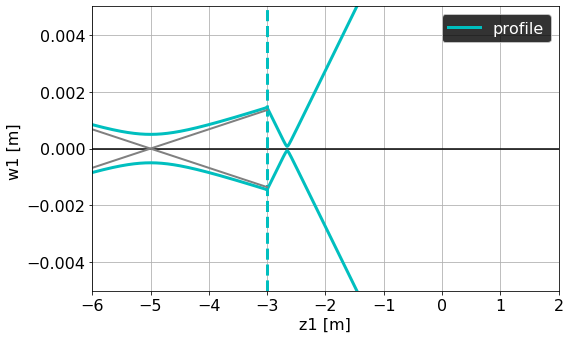

In [7]:
#fig = plt.figure(figsize=(8, 5), dpi=80)
#fig = plt.subplot(figsize=(8, 5), dpi=80)
#fig, ax = plt.subplots(1,1, figsize = (8,5))
#matplotlib.rcParams['font.size'] = 16

fig, ax = plt.subplots(1,1, figsize = (8,5))
matplotlib.rcParams['font.size'] = 16
plt.style.use('dark_background')
#plt.style.use('default')
matplotlib.rcParams['grid.alpha'] = 0.5

plt.plot(zvec,w1,     label = 'profile', color = 'c',     lw = 3) 
plt.plot(zvec,-w1,    color = 'c',      lw = 3)
plt.plot(z1vec, w2,   color = 'c',     lw = 3)
plt.plot(z1vec,-w2,   color = 'c',     lw = 3)
 
plt.plot(zvec,yth1,   color = 'grey',      lw = 2) 
plt.plot(zvec,-yth1,  color = 'grey',      lw = 2)
# matplotlib.pyplot.hlines(y, xmin, xmax, colors='k', linestyles='solid', label='', *, data=None, **kwargs)[source]
plt.hlines(0,-6,Ie)
plt.vlines(z1,-5e-3,5e-3,colors='c',linestyles='--',lw = 3)
#plt.vlines(zR+z0,-1e-3,1e-3,colors='c',linestyles='--',lw = 3)
#plt.vlines(-zR+z0,-1e-3,1e-3,colors='c',linestyles='--',lw = 3)

plt.ylabel("w1 [m] ")
plt.xlabel("z1 [m]")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xlim(Is,2)
plt.ylim(-5e-3,5e-3)
#plt.savefig("profilo.eps")
plt.show()





# Space-Mirror-Space

In [8]:
# limiti plot
Is = -6
Ie = 6
# Posizione Specchio
z1 = -3
z1vec = np.linspace(z1,Ie, 1000)
w2 = np.zeros(len(z1vec))
R2 = np.zeros(len(z1vec))
yth2 = np.zeros(len(z1vec))

zvec = np.linspace(Is, z1, 1000) # (min, max, nsteps)
w1 = np.zeros(len(zvec))
R1 = np.zeros(len(zvec))
yth1 = np.zeros(len(zvec))
# % --------------------------------------------------->
#% Definitions
#% --------------------------------------------------->
lam = 1.064e-6;
#% --------------------------------------------------->
#% Initial Beam
#% --------------------------------------------------->
w0 = .5e-3;           # meters
z0 = -5;              # meters
zR = np.pi*w0**2/lam  # meters
th = 2*lam/(np.pi*w0)

i=0
for s in zvec:
    i=i+1
    # Initial q: q0
    q0 = 1j*np.pi*w0**2/lam
    #% --------------------------------------------------->
    #% Matrices definitions
    #% --------------------------------------------------->
    #% Arms
    S1  = np.array([[1, s],[0, 1]]);
    #% --------------------------------------------------->
    #% Beam propagation
    #% --------------------------------------------------->
    M_qout = S1 @ np.array([[1], [1/q0]]);
    #% New q complex factor
    q1 = M_qout[0]/M_qout[1]-z0;
    #% --------------------------------------------------->
    #% Beam parameters at distance L1
    #% --------------------------------------------------->
    w1[i-1] = np.sqrt(-lam/np.pi*(1/np.imag(1/q1)))
    R1[i-1] = 1/np.real(1/q1);
    yth1[i-1] = th/2 * (s-z0)
    #% --------------------------------------------------->
    
i=0
for s in z1vec:
    i=i+1
    # Initial q: q0
    q0 = 1j*np.pi*w0**2/lam
    #% --------------------------------------------------->
    #% Matrices definitions
    #% --------------------------------------------------->
    #% Arms
    l1 = np.abs(z1-z0)
    S1  = np.array([[1, l1],[0, 1]]);
    Rm = 2*2.27243726+0.01
    F1  = np.array([[1, 0],[-2/Rm, 1]]);
    S2  = np.array([[1, s],[0, 1]]);
    #% --------------------------------------------------->
    #% Beam propagation
    #% --------------------------------------------------->
    M_qout2 = S2 @ F1 @ S1 @ np.array([[1], [1/q0]]);
    #% New q complex factor
    q2 = M_qout2[0]/M_qout2[1]-z1;
    #% --------------------------------------------------->
    #% Beam parameters at distance L1
    #% --------------------------------------------------->
    w2[i-1] = np.sqrt(-lam/np.pi*(1/np.imag(1/q2)))
    R2[i-1] = 1/np.real(1/q2);
    yth2[i-1] = th/2 * (s-z0)
    #% --------------------------------------------------->   

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

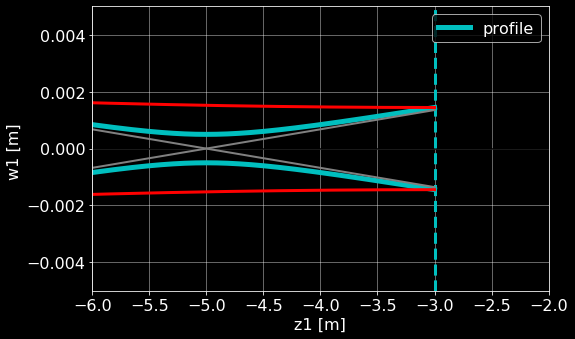

In [9]:
#fig = plt.figure(figsize=(8, 5), dpi=80)
#fig = plt.subplot(figsize=(8, 5), dpi=80)
fig, ax = plt.subplots(1,1, figsize = (8,5))
matplotlib.rcParams['font.size'] = 16
plt.style.use('dark_background')
#plt.style.use('default')
matplotlib.rcParams['grid.alpha'] = 0.5

plt.plot(zvec,w1,     label = 'profile', color = 'c',     lw = 5) 
plt.plot(zvec,-w1,    color = 'c',      lw = 5)
plt.plot(-z1vec+2*z1, w2,   color = 'r',     lw = 3)
plt.plot(-z1vec+2*z1,-w2,   color = 'r',     lw = 3)
 
plt.plot(zvec,yth1,   color = 'grey',      lw = 2) 
plt.plot(zvec,-yth1,  color = 'grey',      lw = 2)
# matplotlib.pyplot.hlines(y, xmin, xmax, colors='k', linestyles='solid', label='', *, data=None, **kwargs)[source]
plt.hlines(0,-6,Ie)
plt.vlines(z1,-5e-3,5e-3,colors='c',linestyles='--',lw = 3)
#plt.vlines(zR+z0,-1e-3,1e-3,colors='c',linestyles='--',lw = 3)
#plt.vlines(-zR+z0,-1e-3,1e-3,colors='c',linestyles='--',lw = 3)

plt.ylabel("w1 [m] ")
plt.xlabel("z1 [m]")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xlim(Is,-2)
plt.ylim(-5e-3,5e-3)
#plt.savefig("xxprofilo_specchio_2*2.27243726+0.01.eps")
plt.show()




